## Final Project 
https://www.kaggle.com/noaa/gsod

In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName("noaa").getOrCreate()

In [4]:
spark

### Step 1 : Import Data

#### Combine all the yearly data files to dataframe 'df_union'

In [5]:
from functools import reduce
from pyspark.sql import DataFrame

df_union = spark.read.csv("s3://big-data-project2020/US_weather_1929.csv",header=True)

for year in range(1930, 2019):
    df = spark.read.csv('s3://big-data-project2020/US_weather_{}.csv'.format(year),header=True)
    dfs = [df_union, df]
    df_union = reduce(DataFrame.unionAll, dfs)
    

In [6]:
df_union.cache()

DataFrame[stn: string, wban: string, year: string, mo: string, da: string, temp: string, count_temp: string, dewp: string, count_dewp: string, slp: string, count_slp: string, stp: string, count_stp: string, visib: string, count_visib: string, wdsp: string, count_wdsp: string, mxpsd: string, gust: string, max: string, flag_max: string, min: string, flag_min: string, prcp: string, flag_prcp: string, sndp: string, fog: string, rain_drizzle: string, snow_ice_pellets: string, hail: string, thunder: string, tornado_funnel_cloud: string]

In [8]:
df_union.count()

150508982

In [7]:
df_union.show(5)

+------+-----+----+---+---+----+----------+----+----------+-----+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|   stn| wban|year| mo| da|temp|count_temp|dewp|count_dewp|  slp|count_slp|   stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd| gust| max|flag_max| min|flag_min| prcp|flag_prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+------+-----+----+---+---+----+----------+----+----------+-----+---------+------+---------+-----+-----------+----+----------+-----+-----+----+--------+----+--------+-----+---------+-----+---+------------+----------------+----+-------+--------------------+
|030050|99999|1929| 10| 03|49.0|         4|41.7|         4|975.7|        4|9999.9|        0| 10.9|          4|10.0|         4| 23.9|999.9|53.1|    null|46.0|    null|99.99|     null|999.9|  0|           1|               0|   0|  

In [8]:
df_union.printSchema()

root
 |-- stn: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- year: string (nullable = true)
 |-- mo: string (nullable = true)
 |-- da: string (nullable = true)
 |-- temp: string (nullable = true)
 |-- count_temp: string (nullable = true)
 |-- dewp: string (nullable = true)
 |-- count_dewp: string (nullable = true)
 |-- slp: string (nullable = true)
 |-- count_slp: string (nullable = true)
 |-- stp: string (nullable = true)
 |-- count_stp: string (nullable = true)
 |-- visib: string (nullable = true)
 |-- count_visib: string (nullable = true)
 |-- wdsp: string (nullable = true)
 |-- count_wdsp: string (nullable = true)
 |-- mxpsd: string (nullable = true)
 |-- gust: string (nullable = true)
 |-- max: string (nullable = true)
 |-- flag_max: string (nullable = true)
 |-- min: string (nullable = true)
 |-- flag_min: string (nullable = true)
 |-- prcp: string (nullable = true)
 |-- flag_prcp: string (nullable = true)
 |-- sndp: string (nullable = true)
 |-- fog: string (

#### Import the weather stations table

In [6]:
stations = spark.read.csv("s3://big-data-project2020/weather_stations.csv",header=True)

In [8]:
stations.cache()

DataFrame[usaf: string, wban: string, name: string, country: string, state: string, call: string, lat: string, lon: string, elev: string, begin: string, end: string]

In [11]:
stations.count()

29751

In [12]:
stations.show()

+------+-----+--------------------+-------+-----+----+------+------+-------+--------+--------+
|  usaf| wban|                name|country|state|call|   lat|   lon|   elev|   begin|     end|
+------+-----+--------------------+-------+-----+----+------+------+-------+--------+--------+
|007018|99999|WXPOD 7018       ...|   null| null|null|   0.0|   0.0|+7018.0|20110309|20130730|
|007026|99999|WXPOD 7026       ...|     AF| null|null|   0.0|   0.0|+7026.0|20120713|20170822|
|007070|99999|WXPOD 7070       ...|     AF| null|null|   0.0|   0.0|+7070.0|20140923|20150926|
|008268|99999|WXPOD8278        ...|     AF| null|null| 32.95|65.567|+1156.7|20100519|20120323|
|008307|99999|WXPOD 8318       ...|     AF| null|null|   0.0|   0.0|+8318.0|20100421|20100421|
|010016|99999|         RORVIK/RYUM|     NO| null|null| 64.85|11.233|+0014.0|19870116|19910806|
|010017|99999|               FRIGG|     NO| null|ENFR| 59.98|  2.25|+0048.0|19880320|20050228|
|010071|99999|        LONGYEARBYEN|     SV| null|n

In [11]:
stations.printSchema()

root
 |-- usaf: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- name: string (nullable = true)
 |-- country: string (nullable = true)
 |-- state: string (nullable = true)
 |-- call: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lon: string (nullable = true)
 |-- elev: string (nullable = true)
 |-- begin: string (nullable = true)
 |-- end: string (nullable = true)



### Step 2: Data Clean

#### check NA value

In [9]:
from pyspark.sql.functions import isnan, when, count, col
df_union.select([count(when(isnan(c), c)).alias(c) for c in df_union.columns]).show()

+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+--------+---+--------+----+---------+----+---+------------+----------------+----+-------+--------------------+
|stn|wban|year| mo| da|temp|count_temp|dewp|count_dewp|slp|count_slp|stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust|max|flag_max|min|flag_min|prcp|flag_prcp|sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+--------+---+--------+----+---------+----+---+------------+----------------+----+-------+--------------------+
|  0|   0|   0|  0|  0|   0|         0|   0|         0|  0|        0|  0|        0|    0|          0|   0|         0|    0|   0|  0|       0|  0|       0|   0|        0|   0|  0|           0|               0|   0|      0|                   0|
+---+----+----+---+---+----+

In [10]:
stations.select([count(when(isnan(c), c)).alias(c) for c in stations.columns]).show()

+----+----+----+-------+-----+----+---+---+----+-----+---+
|usaf|wban|name|country|state|call|lat|lon|elev|begin|end|
+----+----+----+-------+-----+----+---+---+----+-----+---+
|   0|   0|   0|      0|    0|   0|  0|  0|   0|    0|  0|
+----+----+----+-------+-----+----+---+---+----+-----+---+



#### check null values, drop the column or fill the null values

In [7]:
from pyspark.sql.functions import isnan, when, count, col

In [12]:
df_union.select([count(when(col(c).isNull(), c)).alias(c) for c in df_union.columns]).show()

+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+--------+---+--------+----+---------+----+---+------------+----------------+----+-------+--------------------+
|stn|wban|year| mo| da|temp|count_temp|dewp|count_dewp|slp|count_slp|stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust|max|flag_max|min|flag_min|prcp|flag_prcp|sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+--------+---+--------+----+---------+----+---+------------+----------------+----+-------+--------------------+
|  0|   0|   0|  0|  0|   0|         0|   0|         0|  0|        0|  0|        0|    0|          0|   0|         0|    0|   0|  0|83368137|  0|75713928|   0| 13135087|   0|  0|           0|               0|   0|      0|                   0|
+---+----+----+---+---+----+

In [8]:
# The null values exceed 50% of the column, so we drop them
columns_to_drop = ['flag_max', 'flag_min','flag_prcp']
df_union = df_union.drop(*columns_to_drop)

In [14]:
# make sure the right columns have been dropped
df_union.select([count(when(col(c).isNull(), c)).alias(c) for c in df_union.columns]).show()

+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+---+----+----+---+------------+----------------+----+-------+--------------------+
|stn|wban|year| mo| da|temp|count_temp|dewp|count_dewp|slp|count_slp|stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust|max|min|prcp|sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|
+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+---+----+----+---+------------+----------------+----+-------+--------------------+
|  0|   0|   0|  0|  0|   0|         0|   0|         0|  0|        0|  0|        0|    0|          0|   0|         0|    0|   0|  0|  0|   0|   0|  0|           0|               0|   0|      0|                   0|
+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+---+----

In [15]:
stations.select([count(when(col(c).isNull(), c)).alias(c) for c in stations.columns]).show()

+----+----+----+-------+-----+-----+----+----+----+-----+---+
|usaf|wban|name|country|state| call| lat| lon|elev|begin|end|
+----+----+----+-------+-----+-----+----+----+----+-----+---+
|   0|   0| 790|    934|23001|18867|1199|1200|1297|    0|  0|
+----+----+----+-------+-----+-----+----+----+----+-----+---+



In [9]:
stations = stations.na.fill(0)

In [17]:
# make sure the null values have been filled
stations.select([count(when(col(c).isNull(), c)).alias(c) for c in stations.columns]).show()

+----+----+----+-------+-----+-----+----+----+----+-----+---+
|usaf|wban|name|country|state| call| lat| lon|elev|begin|end|
+----+----+----+-------+-----+-----+----+----+----+-----+---+
|   0|   0| 790|    934|23001|18867|1199|1200|1297|    0|  0|
+----+----+----+-------+-----+-----+----+----+----+-----+---+



In [10]:
# drop the repeated colunmn exits in df_union table
stations=stations.drop('wban')

### Step 3: Merge two table by station number

In [19]:
# check the unique station numbers of the df_union table
df_union.select('stn').distinct().count()

22786

In [20]:
# check the unique station numbers of the stations table
stations.select('usaf').distinct().count()

26229

In [11]:
#station number has duplicate value, remove the duplicate value
stations=stations.dropDuplicates(subset=['usaf'])

In [12]:
from pyspark.sql.functions import *
df_merge=df_union.join(stations, df_union.stn == stations.usaf,"left")
df_merge.show(5)

+------+-----+----+---+---+----+----------+----+----------+-----+---------+------+---------+-----+-----------+----+----------+-----+-----+----+----+-----+-----+---+------------+----------------+----+-------+--------------------+------+-------+-------+-----+----+------+------+-------+--------+--------+
|   stn| wban|year| mo| da|temp|count_temp|dewp|count_dewp|  slp|count_slp|   stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd| gust| max| min| prcp| sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|  usaf|   name|country|state|call|   lat|   lon|   elev|   begin|     end|
+------+-----+----+---+---+----+----------+----+----------+-----+---------+------+---------+-----+-----------+----+----------+-----+-----+----+----+-----+-----+---+------------+----------------+----+-------+--------------------+------+-------+-------+-----+----+------+------+-------+--------+--------+
|030050|99999|1929| 10| 03|49.0|         4|41.7|         4|975.7|        4|9999.9|        0

In [117]:
#make sure the row number is the same as the df_union table
df_merge.count()

150508982

In [23]:
#check null value
df_merge.select([count(when(col(c).isNull(), c)).alias(c) for c in df_merge.columns]).show()

+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+---+----+----+---+------------+----------------+----+-------+--------------------+------+------+-------+---------+--------+------+------+------+------+------+
|stn|wban|year| mo| da|temp|count_temp|dewp|count_dewp|slp|count_slp|stp|count_stp|visib|count_visib|wdsp|count_wdsp|mxpsd|gust|max|min|prcp|sndp|fog|rain_drizzle|snow_ice_pellets|hail|thunder|tornado_funnel_cloud|  usaf|  name|country|    state|    call|   lat|   lon|  elev| begin|   end|
+---+----+----+---+---+----+----------+----+----------+---+---------+---+---------+-----+-----------+----+----------+-----+----+---+---+----+----+---+------------+----------------+----+-------+--------------------+------+------+-------+---------+--------+------+------+------+------+------+
|  0|   0|   0|  0|  0|   0|         0|   0|         0|  0|        0|  0|        0|    0|          0|   0|         0|    0|   0

In [13]:
# fill the null value
df_merge = df_merge.na.fill(0)

In [14]:
#change data type
from pyspark.sql.types import IntegerType
df_merge= df_merge.withColumn("stn", df_merge["stn"].cast(IntegerType()))
df_merge= df_merge.withColumn("wban", df_merge["wban"].cast(IntegerType()))
df_merge= df_merge.withColumn("year", df_merge["year"].cast(IntegerType()))
df_merge= df_merge.withColumn("mo", df_merge["mo"].cast(IntegerType()))
df_merge= df_merge.withColumn("da", df_merge["da"].cast(IntegerType()))
df_merge= df_merge.withColumn("count_temp", df_merge["count_temp"].cast(IntegerType()))
df_merge= df_merge.withColumn("count_slp", df_merge["count_slp"].cast(IntegerType()))
df_merge= df_merge.withColumn("count_stp", df_merge["count_stp"].cast(IntegerType()))
df_merge= df_merge.withColumn("count_wdsp", df_merge["count_wdsp"].cast(IntegerType()))
df_merge= df_merge.withColumn("count_visib", df_merge["count_visib"].cast(IntegerType()))
df_merge= df_merge.withColumn("fog", df_merge["fog"].cast(IntegerType()))
df_merge= df_merge.withColumn("rain_drizzle", df_merge["rain_drizzle"].cast(IntegerType()))
df_merge= df_merge.withColumn("snow_ice_pellets", df_merge["snow_ice_pellets"].cast(IntegerType()))
df_merge= df_merge.withColumn("hail", df_merge["hail"].cast(IntegerType()))
df_merge= df_merge.withColumn("thunder", df_merge["thunder"].cast(IntegerType()))
df_merge= df_merge.withColumn("tornado_funnel_cloud", df_merge["tornado_funnel_cloud"].cast(IntegerType()))
df_merge= df_merge.withColumn("count_dewp", df_merge["count_dewp"].cast(IntegerType()))
df_merge= df_merge.withColumn("begin", df_merge["begin"].cast(IntegerType()))
df_merge= df_merge.withColumn("end", df_merge["end"].cast(IntegerType()))

In [15]:
from pyspark.sql.types import DoubleType
df_merge= df_merge.withColumn("temp", df_merge["temp"].cast(DoubleType()))
df_merge= df_merge.withColumn("dewp", df_merge["dewp"].cast(DoubleType()))
df_merge= df_merge.withColumn("slp", df_merge["slp"].cast(DoubleType()))
df_merge= df_merge.withColumn("stp", df_merge["stp"].cast(DoubleType()))
df_merge= df_merge.withColumn("visib", df_merge["visib"].cast(DoubleType()))
df_merge= df_merge.withColumn("wdsp", df_merge["wdsp"].cast(DoubleType()))
df_merge= df_merge.withColumn("mxpsd", df_merge["mxpsd"].cast(DoubleType()))
df_merge= df_merge.withColumn("gust", df_merge["gust"].cast(DoubleType()))
df_merge= df_merge.withColumn("prcp", df_merge["prcp"].cast(DoubleType()))
df_merge= df_merge.withColumn("max", df_merge["max"].cast(DoubleType()))
df_merge= df_merge.withColumn("min", df_merge["min"].cast(DoubleType()))
df_merge= df_merge.withColumn("sndp", df_merge["sndp"].cast(DoubleType()))
df_merge= df_merge.withColumn("lat", df_merge["lat"].cast(DoubleType()))
df_merge= df_merge.withColumn("lon", df_merge["lon"].cast(DoubleType()))
df_merge= df_merge.withColumn("elev", df_merge["elev"].cast(DoubleType()))

In [16]:
# check data type
df_merge.printSchema()

root
 |-- stn: integer (nullable = true)
 |-- wban: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- mo: integer (nullable = true)
 |-- da: integer (nullable = true)
 |-- temp: double (nullable = true)
 |-- count_temp: integer (nullable = true)
 |-- dewp: double (nullable = true)
 |-- count_dewp: integer (nullable = true)
 |-- slp: double (nullable = true)
 |-- count_slp: integer (nullable = true)
 |-- stp: double (nullable = true)
 |-- count_stp: integer (nullable = true)
 |-- visib: double (nullable = true)
 |-- count_visib: integer (nullable = true)
 |-- wdsp: double (nullable = true)
 |-- count_wdsp: integer (nullable = true)
 |-- mxpsd: double (nullable = true)
 |-- gust: double (nullable = true)
 |-- max: double (nullable = true)
 |-- min: double (nullable = true)
 |-- prcp: double (nullable = true)
 |-- sndp: double (nullable = true)
 |-- fog: integer (nullable = true)
 |-- rain_drizzle: integer (nullable = true)
 |-- snow_ice_pellets: integer (nullable = true

### Step 4: Data visualization and basic insights

##### Calculate the average temperature of different country

In [31]:
df_c = df_merge.groupby('country').agg({'temp':'mean'})
df_c.sort(df_c['avg(temp)'].desc()).show()

+-------+-----------------+
|country|        avg(temp)|
+-------+-----------------+
|     DJ|86.59916057826833|
|     CD| 85.0348771975602|
|     SU|84.34931763717847|
|     ML|84.34395323045999|
|     NG|84.23724590105995|
|     HA|83.81910556738664|
|     TL|83.76287450066584|
|     UV|83.27684789685122|
|     TV| 83.0699499319351|
|     CB|82.97690869979203|
|     MV|82.97255055959153|
|     AA|82.90004122982673|
|     VC|82.77375947487694|
|     VI|82.72398291750956|
|     SG|82.59625909014031|
|     KR|82.43631437386279|
|     MR|82.40277377898764|
|     RM|82.39523702031599|
|     NT|82.29063583610494|
|     PU|82.25312772766944|
+-------+-----------------+
only showing top 20 rows



##### Check which station has the top observation times

In [32]:
df_stn=df_merge.groupby('stn').count()
df_stn.sort(df_stn['count'].desc()).show()

+------+-------+
|   stn|  count|
+------+-------+
|999999|5476544|
|949999| 101315|
|722860|  31370|
|745700|  30101|
|745980|  29985|
|725377|  29931|
|722535|  29762|
|722265|  29720|
|723030|  29649|
|724338|  29522|
|722210|  29329|
|911820|  29069|
|722485|  28873|
|949260|  28692|
|722536|  28446|
|744910|  28359|
|724050|  28330|
|703980|  28256|
|722650|  28180|
|727855|  28161|
+------+-------+
only showing top 20 rows



##### Check the average temperature by month through all the years (1929 to 2019).

In [20]:
from pyspark.sql.functions import col, avg
temp_mo = df_merge.groupby('mo').agg({'temp': 'mean'})

In [19]:
temp_mo.show()

+---+------------------+
| mo|         avg(temp)|
+---+------------------+
|  7| 69.04258379575136|
| 11| 45.36091775047502|
|  3| 44.20142340704085|
|  8|   68.125664820822|
|  5|59.742288190060385|
|  6| 65.68004544970663|
|  9|62.661399104100404|
|  1| 35.54832121132603|
| 10|   54.501178192195|
|  4|52.260535995400225|
| 12| 38.38429827801016|
|  2|37.827049091905735|
+---+------------------+



##### Plot the average temperature for each month

In [21]:
temp_mo_pandas = temp_mo.toPandas()

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


In [22]:
temp_mo_pandas = temp_mo_pandas.sort_values(by=['mo'])

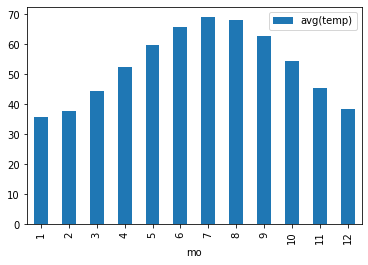

In [23]:
# Create a bar plot
temp_mo_pandas.plot(kind='bar', x='mo', y='avg(temp)')

##### The probability to have fog through all the monthes:

In [18]:
fog_mo = df_merge.groupby('mo').agg({'fog': 'mean'})

In [19]:
fog_mo_pandas = fog_mo.toPandas()
fog_mo_pandas = fog_mo_pandas.sort_values(by=['mo'])

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


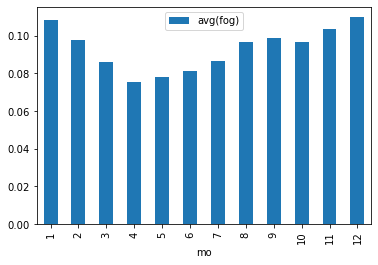

In [20]:
# Create a plot
fog_mo_pandas.plot(kind='bar', x='mo', y='avg(fog)')

##### The probability to rain through all the monthes:

In [18]:
rain_drizzle_mo = df_merge.groupby('mo').agg({'rain_drizzle': 'mean'})

In [19]:
rain_drizzle_mo_pandas = rain_drizzle_mo.toPandas()
rain_drizzle_mo_pandas = rain_drizzle_mo_pandas.sort_values(by=['mo'])

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


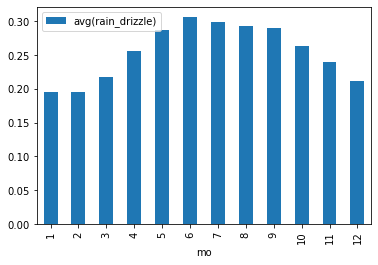

In [20]:
# Create a plot
rain_drizzle_mo_pandas.plot(kind='bar', x='mo', y='avg(rain_drizzle)')

##### Check the average temperature trending from 1929 to 2019

In [135]:
temp_year = df_merge.groupby('year').agg({'temp': 'mean'})

In [136]:
temp_year_pandas = temp_year.toPandas()
temp_year_pandas = temp_year_pandas.sort_values(by=['year'])

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


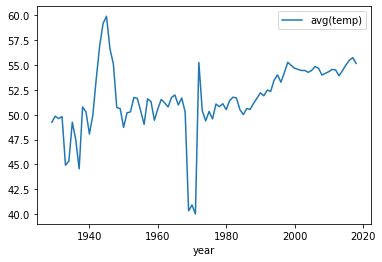

In [137]:
# Create a plot
temp_year_pandas.plot(kind='line', x='year', y='avg(temp)')

The temperature trending plot shows the peak value in around 1945, and it has a big drop in around 1970. Otherwise, it is continually increasing in general. And the plot seems to be more stable in the recent years, we suppose one of the reasons would be the sufficiency of data (more records for recent years).

##### Check the visibility trending through all the years (visib: Mean visibility for the day in miles to tenths.)

In [17]:
visib_year = df_merge.groupby('year').agg({'visib': 'mean'})

In [18]:
visib_year_pandas = visib_year.toPandas()
visib_year_pandas = visib_year_pandas.sort_values(by=['year'])

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


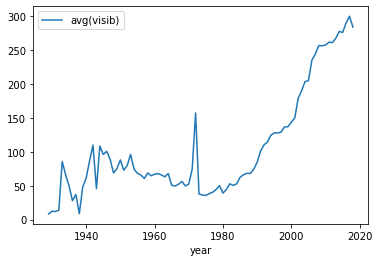

In [20]:
# Create a plot
visib_year_pandas.plot(kind='line', x='year', y='avg(visib)')

Clearly, the 'visib' value (Mean visibility for the day in miles to tenths) is continuously increasing during the past 40 years (from 1980 to 2020). And that means the air quality is becoming worse and worse.

##### The probability to have tornado through all the years:

In [18]:
tornado_funnel_cloud_year = df_merge.groupby('year').agg({'tornado_funnel_cloud': 'mean'})

In [20]:
tornado_funnel_cloud_year_pandas = tornado_funnel_cloud_year.toPandas()
tornado_funnel_cloud_year_pandas = tornado_funnel_cloud_year_pandas.sort_values(by=['year'])

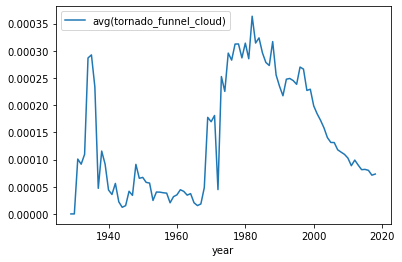

In [21]:
# Create a plot
tornado_funnel_cloud_year_pandas.plot(kind='line', x='year', y='avg(tornado_funnel_cloud)')

##### The probability to have hail through all the years:

In [18]:
hail_year = df_merge.groupby('year').agg({'hail': 'mean'})

In [19]:
hail_year_pandas = hail_year.toPandas()
hail_year_pandas = hail_year_pandas.sort_values(by=['year'])

/usr/lib/spark/python/pyspark/sql/dataframe.py:2103: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 0.8.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


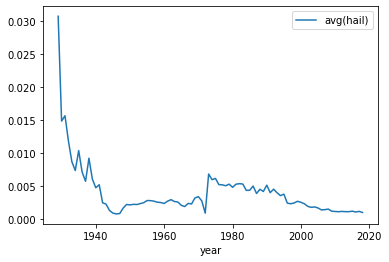

In [20]:
# Create a plot
hail_year_pandas.plot(kind='line', x='year', y='avg(hail)')

##### Check which states have the highest average temperatures in US

In [21]:
# Filter the data by country, 'US'
df_merge_us = df_merge.filter(col("country") == 'US')
temp_state = df_merge_us.groupby('state').agg({'temp': 'mean'})

In [22]:
temp_state.orderBy("avg(temp)", ascending=False).show(20)

+-----+------------------+
|state|         avg(temp)|
+-----+------------------+
|   VI| 81.51803471791696|
|   PR| 80.50003435639032|
|   HI| 74.81340272329174|
|   FL| 71.95055290033883|
|   LA| 68.43210198912307|
|   TX|   67.355976644968|
|   AZ| 66.12359355791034|
|   MS| 65.24814146957627|
|   AL| 64.82867259461699|
|   GA| 64.69119849652121|
|   SC| 63.70748348126233|
|   NC| 61.24455689905607|
|   CA| 61.22842509589877|
|   OK|61.036226777768114|
|   TN| 59.44534758863276|
|   DC| 58.63294584632835|
|   VA|  58.1826065001907|
| null| 57.50482942124794|
|   NM|57.431120708372504|
|   KY| 57.02336977690355|
+-----+------------------+
only showing top 20 rows



As we can see from the list above, the top 2 states or areas with the highest average temperatures are US insular areas or freely associated states. And among only the federal states in US, HI (Hawaii) has the highest average temperature (74.81 F).

##### Check which states have the lowest average temperatures in US

In [23]:
temp_state.orderBy("avg(temp)", ascending=True).show(20)

+-----+------------------+
|state|         avg(temp)|
+-----+------------------+
|   AK| 32.50153694177561|
|   ND|41.317627261970955|
|   MN| 43.20860436149174|
|   ME| 44.11529434780382|
|   WY|44.144185678565016|
|   MT|44.400131249224664|
|   VT|  45.3288658664143|
|   NH| 45.74374380966702|
|   WI|45.953856659286885|
|   MI|46.306743979694595|
|   SD|46.666053018639666|
|   ID| 47.33162111352138|
|   CO| 47.71293182768713|
|   NY| 49.24410165740538|
|   IA| 49.61576665462327|
|   MA|50.196696642259944|
|   NE| 50.73765991856351|
|   WA|50.878568359494075|
|   OR| 51.10481022337268|
|   CT| 51.55897069684265|
+-----+------------------+
only showing top 20 rows



From the table shown below, AK (Alaska) has the lowest temperatures among all the federal states in US. The states ND and MN also have very low average temperatures compared to other states.

##### Check which states have the highest tornado frequencies in US

In [24]:
df_tornado = df_merge_us.groupby('state').agg({'tornado_funnel_cloud': 'mean'})
df_tornado.orderBy("avg(tornado_funnel_cloud)", ascending=False).show(10)

+-----+-------------------------+
|state|avg(tornado_funnel_cloud)|
+-----+-------------------------+
|   PR|     0.009428920445869599|
|   FL|     0.001271217401945033|
|   VI|     4.339739615623063E-4|
|   HI|     4.019618831914227...|
|   LA|     3.091708261938464E-4|
|   MS|     2.177795200139379E-4|
|   ND|     1.807189887920129E-4|
|   CO|     1.640137443517766...|
|   SD|     1.305877824819926...|
|   TX|     1.234431116972972...|
+-----+-------------------------+
only showing top 10 rows



The top 1 state PR is not in mainland US. So the federal state with the highest tornado frequency is FL (Florida). The states, HI(Hawaii), LA(Louisiana), and MS(Mississippi) also have the relatively high tornado frequency. The result shows that the southeast area in US have the most tornado  from the historical data.

### Step 5: Model: Linear Regression

##### Predict temp (temperature) by applying linear regression model

In [133]:
column_list=df_merge.columns
column_list.remove('temp')
column_list.remove('name')
column_list.remove('country')
column_list.remove('call')
column_list.remove('state')
column_list.remove('usaf')

In [34]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = column_list, outputCol = 'features')
feature_df = vectorAssembler.transform(df_merge)
feature_df = feature_df.select('features','temp')

In [35]:
feature_df.printSchema()

root
 |-- features: vector (nullable = true)
 |-- temp: double (nullable = true)



In [36]:
splits = feature_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [133]:
from pyspark.ml.regression import LinearRegression

glr =LinearRegression(labelCol='temp')
# Fit the model
model = glr.fit(train_df)

# Print the coefficients and intercept for generalized linear regression model
print("Coefficients: " + str(model.coefficients))
print("Intercept: " + str(model.intercept))

Coefficients: [2.087385033393046e-06,-1.9288068969359448e-05,0.09837741385879577,0.5590537798577633,0.00807438274642832,-0.0041461997747534365,-0.00023175501504266516,0.04645270205849056,0.00022860428457861814,0.11057384152597638,-7.949375884470427e-05,-0.12183661274204463,-0.010170487609863636,-0.1407524689033808,0.008513547012072591,0.1129728178073879,-0.010553499017953607,0.0016725598109298735,0.0008818081361629379,0.0015688178891253134,-0.02368903980012001,0.022893732473218485,-2.890863642952966,2.720621906215026,-23.186296226549786,-1.2501756078856652,11.131486528310038,4.691438456446565,-0.2891916049733953,-0.009406885089380713,-0.005695926302666776,-2.6601926428279935e-06,2.798325687647919e-06]
Intercept: -159.4200355301145


In [134]:
# Summarize the model over the training set and print out some metrics
trainingSummary = model.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

numIterations: 1
objectiveHistory: [0.0]
+-------------------+
|          residuals|
+-------------------+
| -0.509135942061377|
| 2.8727518936009915|
|-0.3916858500386553|
|0.23798457832526765|
|  3.267996247578992|
| 1.9671692476204754|
| 0.5820814773259997|
|-1.2460597555226656|
| 2.7784426998817224|
| 2.1764122504540637|
| 6.1424305423344805|
| 1.5760432886100944|
|-2.3934329488963044|
|   2.06463956210402|
|-2.3941262326415114|
| -4.524794001582933|
|0.22728686767437978|
| -2.392125017648098|
|  2.374876808746805|
| 0.5129769767949028|
+-------------------+
only showing top 20 rows

RMSE: 18.473093
r2: 0.405448


In [135]:
training_predictions=model.evaluate(train_df)

In [138]:
training_predictions.meanSquaredError

341.25514775564164

##### Predict prcp (Total precipitation) by applying linear regression model

In [72]:
column_list1

['dewp',
 'slp',
 'stp',
 'visib',
 'wdsp',
 'mxpsd',
 'max',
 'min',
 'sndp',
 'fog',
 'rain_drizzle',
 'snow_ice_pellets',
 'hail',
 'thunder',
 'tornado_funnel_cloud']

In [71]:
column_list1=df_merge.columns
column_list1.remove('year')
column_list1.remove('stn')
column_list1.remove('wban')
column_list1.remove('mo')
column_list1.remove('da')
column_list1.remove('count_temp')
column_list1.remove('count_dewp')
column_list1.remove('count_slp')
column_list1.remove('count_visib')
column_list1.remove('count_wdsp')
column_list1.remove('temp')
column_list1.remove('name')
column_list1.remove('country')
column_list1.remove('call')
column_list1.remove('state')
column_list1.remove('usaf')
column_list1.remove('count_stp')
column_list1.remove('gust')
column_list1.remove('elev')
column_list1.remove('begin')
column_list1.remove('end')
column_list1.remove('prcp')
column_list1.remove('lat')
column_list1.remove('lon')

In [73]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler1 = VectorAssembler(inputCols = column_list1, outputCol = 'features')
df_sealevel = vectorAssembler1.transform(df_merge)
df_sealevel = df_sealevel.select('features', 'prcp')
df_sealevel.show(3)

+--------------------+-----+
|            features| prcp|
+--------------------+-----+
|[41.7,975.7,9999....|99.99|
|[38.5,992.0,9999....|99.99|
|[44.8,979.1,9999....|99.99|
+--------------------+-----+
only showing top 3 rows



In [74]:
splits = df_sealevel.randomSplit([0.7, 0.3])
train_data = splits[0]
test_data = splits[1]

In [75]:
from pyspark.ml.regression import LinearRegression
lr =LinearRegression(labelCol='prcp')
lr_model = lr.fit(train_data)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.00018696317867064553,0.0010771441519401546,-8.410365577598224e-05,-0.0016133361668619558,-0.0010751325202025227,-0.0012045561388737622,0.0004559656703108655,0.00043436999148354965,0.008749902148559268,2.8757642032794637,25.006039981647632,21.767127716727344,-10.963187181528818,0.4150264877468609,-4.380100085168109]
Intercept: -11.100620936997403


In [76]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 24.889138
r2: 0.221144


In [80]:
lr_predictions = lr_model.transform(test_data)
lr_predictions.select("prediction","prcp","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="prcp",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-------------------+----+--------------------+
|         prediction|prcp|            features|
+-------------------+----+--------------------+
|-3.2483283871047766| 0.0|(15,[0,1,2,3,5,6,...|
|  6.122335136415002| 0.0|(15,[0,1,2,4,5,6,...|
|  6.105508622485781| 0.0|(15,[0,1,2,4,5,6,...|
|  6.119242414244846| 0.0|(15,[0,1,2,4,5,6,...|
|  6.123244758536378| 0.0|(15,[0,1,2,4,5,6,...|
+-------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.22109


In [81]:
test_result = lr_model.evaluate(test_data)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 24.8886
